# Introduction

This dataset is a collection of heart rate variability measurements, data from user wearables, and clinically validated physical and mental health assessments. The main goal of this dataset is to detect patterns and relationships when combined with Covid symptoms.

The sampling done was with the Welltory app. Users with a positive COVID-19 status tracked their information via the application.

We do a complete exploratory data analysis for hrv-covid19 repository containing multiple datasets.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr as pcr
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
blood_pressure = pd.read_csv("blood_pressure.csv", header=0)
heart_rate = pd.read_csv("heart_rate.csv", header=0)
hrv_measurements = pd.read_csv("hrv_measurements.csv", header=0)
participants = pd.read_csv("participants.csv", header=0)
scales_description = pd.read_csv("scales_description.csv", header=0)
sleep = pd.read_csv("sleep.csv", header=0)
surveys = pd.read_csv("surveys.csv", header=0)
wearables = pd.read_csv("wearables.csv", header=0)
weather = pd.read_csv("weather.csv", header=0)

In [4]:
#example outputs
blood_pressure.head()

,user_code,measurement_datetime,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index
0,01bad5a519,2020-04-29 22:33:33,100,150,NaN,NaN,NaN,NaN
1,01bad5a519,2020-04-30 01:33:33,100,150,NaN,NaN,NaN,NaN
2,01bad5a519,2020-04-30 09:16:38,95,140,3.38,4545.0,6.0,141.4
3,01bad5a519,2020-04-30 12:16:38,95,140,NaN,NaN,NaN,NaN
4,01bad5a519,2020-05-01 06:58:06,80,130,2.89,4000.0,NaN,104.0


#### Statistical Summaries

Data Quality checks (null values), basic quantitative explorations (quantiles), and data type break-downs

In [5]:
def understand_df(df):
    # Dimensions of dataset
    print("-----------------------------------------")
    print("Dimension of the dataset is", df.shape, "\n")

    # Summary of dataset
    print("-----------------------------------------")
    print("Summary of the dataset is \n", df.describe(), "\n")
    
    print("-----------------------------------------")  
    print("Number of duplicates:")
    print(df.duplicated().sum())

    # Stats of dataset
    stats = []

    for col in df.columns:
        stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Type'])
    print("-----------------------------------------")
    
    print(f"Statistics of the dataset are \n {stats_df.sort_values('Percentage of missing values', ascending=False)}\n\n")

In [6]:
understand_df(blood_pressure)

-----------------------------------------
Dimension of the dataset is (721, 8) 

-----------------------------------------
Summary of the dataset is 
         diastolic    systolic  functional_changes_index  \
count  721.000000  721.000000                299.000000   
mean    81.228849  119.441054                  2.594013   
std      8.865761   10.522578                  0.291302   
min     25.000000   63.000000                  1.680000   
25%     76.000000  113.000000                  2.440000   
50%     82.000000  120.000000                  2.580000   
75%     88.000000  126.000000                  2.730000   
max    101.000000  157.000000                  3.510000   

       circulatory_efficiency  kerdo_vegetation_index  robinson_index  
count              299.000000              283.000000      299.000000  
mean              2735.197057              -15.498233       84.663779  
std                747.882570               18.681233       14.399208  
min               1300.000000

In [7]:
understand_df(heart_rate)

-----------------------------------------
Dimension of the dataset is (523783, 4) 

-----------------------------------------
Summary of the dataset is 
           heart_rate     is_resting
count  523783.000000  523783.000000
mean       90.856626       0.005546
std        25.054152       0.074266
min        10.000000       0.000000
25%        71.000000       0.000000
50%        87.000000       0.000000
75%       108.000000       0.000000
max       232.000000       1.000000 

-----------------------------------------
Number of duplicates:
0
-----------------------------------------
Statistics of the dataset are 
       Feature  Unique_values  Percentage of missing values    Type
0   user_code             79                           0.0  object
1    datetime         506422                           0.0  object
2  heart_rate            194                           0.0   int64
3  is_resting              2                           0.0   int64




In [8]:
understand_df(hrv_measurements)

-----------------------------------------
Dimension of the dataset is (3245, 22) 

-----------------------------------------
Summary of the dataset is 
                bpm       meanrr        mxdmn         sdnn        rmssd  \
count  3245.000000  3245.000000  3245.000000  3245.000000  3245.000000   
mean     73.257935   839.600366     0.184635    52.489218    52.814196   
std      12.201088   137.420367     0.107456    29.369506    39.353213   
min      44.000000   477.730000     0.030000     9.515000     6.340000   
25%      65.000000   742.490000     0.110000    32.585000    28.985000   
50%      72.000000   829.100000     0.160000    46.919000    42.869000   
75%      81.000000   925.933000     0.220000    64.406000    62.485000   
max     125.000000  1346.740000     0.790000   206.631000   310.800000   

             pnn50         mode          amo            lf            hf  \
count  3245.000000  3245.000000  3245.000000   3245.000000   3245.000000   
mean     20.615609     0.837

In [9]:
understand_df(participants)

-----------------------------------------
Dimension of the dataset is (185, 8) 

-----------------------------------------
Summary of the dataset is 
            height      weight
count  183.000000  185.000000
mean   169.976393   77.927757
std     12.400103   19.552541
min    132.080000   43.500000
25%    163.500000   63.500000
50%    168.000000   74.344000
75%    174.500000   90.537000
max    250.000000  154.221000 

-----------------------------------------
Number of duplicates:
0
-----------------------------------------
Statistics of the dataset are 
           Feature  Unique_values  Percentage of missing values     Type
7  symptoms_onset             74                     20.540541   object
3            city            116                      6.486486   object
4         country             25                      3.243243   object
5          height             54                      1.081081  float64
0       user_code            185                      0.000000   object
1    

In [10]:
understand_df(sleep)

-----------------------------------------
Dimension of the dataset is (425, 12) 

-----------------------------------------
Summary of the dataset is 
        sleep_duration  sleep_awake_duration  sleep_rem_duration  \
count      425.000000              9.000000            7.000000   
mean     25699.731765           2733.333333         6518.571429   
std       7773.805470            671.900290         2081.613385   
min        930.000000           1740.000000         2820.000000   
25%      21857.000000           2460.000000         5730.000000   
50%      26041.000000           2490.000000         6240.000000   
75%      30600.000000           2790.000000         8190.000000   
max      47460.000000           4200.000000         8730.000000   

       sleep_light_duration  sleep_deep_duration   pulse_min   pulse_max  \
count             27.000000            14.000000   15.000000   15.000000   
mean           14514.740741          4280.285714   60.533333   89.866667   
std             

In [11]:
understand_df(surveys)

-----------------------------------------
Dimension of the dataset is (2259, 5) 

-----------------------------------------
Summary of the dataset is 
              value
count  2259.000000
mean      2.364763
std       1.554934
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max       6.000000 

-----------------------------------------
Number of duplicates:
0
-----------------------------------------
Statistics of the dataset are 
       Feature  Unique_values  Percentage of missing values    Type
0   user_code            111                           0.0  object
1       scale             58                           0.0  object
2  created_at             50                           0.0  object
3       value              6                           0.0   int64
4        text             65                           0.0  object




In [12]:
understand_df(wearables)

-----------------------------------------
Dimension of the dataset is (3098, 18) 

-----------------------------------------
Summary of the dataset is 
        resting_pulse  pulse_average    pulse_min    pulse_max  \
count    1515.000000    2089.000000  2089.000000  2089.000000   
mean       61.409241      78.084251    63.078506    99.456199   
std        12.775324      14.366994    14.334455    29.298930   
min        40.000000      48.000000    10.000000    48.000000   
25%        52.000000      69.000000    53.000000    76.000000   
50%        58.000000      76.000000    60.000000    96.000000   
75%        69.000000      85.000000    72.000000   118.000000   
max       109.000000     163.000000   122.000000   225.000000   

       average_spo2_value  body_temperature_avg  stand_hours_total  \
count            40.00000             65.000000         531.000000   
mean              0.96100             36.404615           8.986817   
std               0.02134              0.239394    

In [13]:
understand_df(weather)

-----------------------------------------
Dimension of the dataset is (1717, 7) 

-----------------------------------------
Summary of the dataset is 
        avg_temperature_C  atmospheric_pressure  precip_intensity     humidity  \
count        1717.000000           1717.000000       1717.000000  1717.000000   
mean           11.839221           1014.111639          0.003803    66.376586   
std             7.769565              8.356792          0.015348    19.339670   
min           -13.150000            984.300000          0.000000     3.000000   
25%             6.472200           1009.000000          0.000000    54.000000   
50%            11.272200           1014.100000          0.000200    68.000000   
75%            16.663900           1019.566700          0.001700    81.000000   
max            44.072200           1047.750000          0.256700   100.000000   

            clouds  
count  1717.000000  
mean     56.401734  
std      35.048917  
min       0.000000  
25%      24.5

In [14]:
dfs_to_join = [blood_pressure, heart_rate, hrv_measurements, participants]

#### Removing outliers

In [15]:
#First, we remove and winsorize the outliers. We will use the Inter Quartile Range to remove the outliers
def winsorize_outliers(df):
    # Iterate through each column in the DataFrame
    for column in df.select_dtypes(include=[np.number]).columns:
        # Calculate Q1 and Q3
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        # Calculate Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Winsorizing outliers
        df.loc[:,column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

In [16]:
for df in dfs_to_join:
    df = winsorize_outliers(df)

In [17]:
def replace_missing_values_with_mean(df):
    """
    Fill missing values in a DataFrame with 'unknown' for categorical columns
    and mean for numerical columns.

    Args:
    df (pd.DataFrame): The DataFrame to process.

    Returns:
    pd.DataFrame: The DataFrame with missing values filled.
    """
    # Iterate over columns in DataFrame
    for c in df.columns:
        if df[c].dtype.name == "object":
            # Fill missing values with 'unknown' for categorical columns
            df.loc[:, [c]].fillna('unknown', inplace=True)
        else:
            # Fill missing values with the mean for numerical columns, since we already winsorized the outliers
            df.loc[:, [c]].fillna(np.mean(df[c]), inplace=True)
    return df

Drop duplicate rows, drop columns with majority missing values (>50%), and replace missing entries with column mean. 

In [18]:
def drop_cols(df, percentage=0.5):

  # drop duplicated rows, since they don't provide new info. 
  df.drop_duplicates(keep="last", inplace=True)

  # Drop the columns where missing values constitutes more than 50% of all values
  drop_cols = []

  # Iteratively add columns to the list wih missing percentage greater than default
  for col in df.columns:
      missing_share = df[col].isnull().sum()/df.shape[0]
      if missing_share > percentage:
          drop_cols.append(col)
          print(col)

  # return only the other columns
  good_cols = [col for col in df.columns if col not in drop_cols]
  return df[good_cols]

In [19]:
for df in dfs_to_join:
    df = drop_cols(df)
    df = replace_missing_values_with_mean(df)

functional_changes_index
circulatory_efficiency
kerdo_vegetation_index
robinson_index
how_sleep


Merging Datasets. For this project, we will have two different datasets to combine and analyze

In [20]:
full_health_a = pd.merge(left=heart_rate, right=blood_pressure, how="inner", on="user_code")
full_health_b = pd.merge(left=hrv_measurements, right=participants, how="inner", on="user_code")
full_health_a.head()

,user_code,datetime,heart_rate,is_resting,measurement_datetime,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index
0,01bad5a519,2020-04-23 06:21:03,74.0,0,2020-04-29 22:33:33,100,145.5,NaN,NaN,NaN,NaN
1,01bad5a519,2020-04-23 06:21:03,74.0,0,2020-04-30 01:33:33,100,145.5,NaN,NaN,NaN,NaN
2,01bad5a519,2020-04-23 06:21:03,74.0,0,2020-04-30 09:16:38,95,140.0,3.165,4315.5,6.0,119.555
3,01bad5a519,2020-04-23 06:21:03,74.0,0,2020-04-30 12:16:38,95,140.0,NaN,NaN,NaN,NaN
4,01bad5a519,2020-04-23 06:21:03,74.0,0,2020-05-01 06:58:06,80,130.0,2.890,4000.0,NaN,104.000


In [21]:
#For this dataset, we will look for the relationships between sleep and wearables
combined_data = pd.merge(sleep, wearables, on=['user_code', 'day'], how='inner')

#healthy humans will be a subset of this dataset
healthy_humans = combined_data[['sleep_duration','pulse_average_x', 'pulse_average_y','total_calories_burned']]
healthy_humans.head()

,sleep_duration,pulse_average_x,pulse_average_y,total_calories_burned
0,19881.0,NaN,85.0,2673.0
1,21068.0,NaN,75.0,3052.0
2,30910.0,NaN,87.0,2831.0
3,26695.0,72.5,80.0,2709.0
4,31458.0,NaN,108.0,2674.0


Some additional cleaning

In [22]:
healthy_humans = winsorize_outliers(healthy_humans)
healthy_humans = drop_cols(healthy_humans)
healthy_humans = replace_missing_values_with_mean(healthy_humans)

pulse_average_x


The following function is copy and pasted from this link: 

https://forum.numer.ai/t/reducing-memory/313

Its only purpose is to reduce the data size to make computation a bit faster in the notebook.

In [23]:
# Reduce memory usage
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage(deep=True).sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [24]:
full_health_a = reduce_mem_usage(full_health_a)
full_health_b = reduce_mem_usage(full_health_b)

Mem. usage decreased to 3125.05 Mb (19.2% reduction)
Mem. usage decreased to  3.44 Mb (9.0% reduction)


In [25]:
if full_health_a.index.duplicated().any():
    print("Duplicate index labels found, resetting index.")
    # Reset the index to remove duplicates
    full_health_a = full_health_a.reset_index(drop=True)

#### Data Transformations and Dimensionality Reduction

PCA is a proven way to reduce dimensions, but at the cost of reduced interpretability. Alternatively, we can combine similar columns that are most associated in a mathematically valid way.

What we can do is standardize the measurements of certain variables (MinMax scaler) and do an average over the standardized values of similar variables. 

Alternatively, create the difference or ratio between several related columns to reduce dimensionality. Or create new metric that utilizes columns we want to remove. 

For the blood_pressure dataset, we can create new columns "hf-lf" to get sympathovagal balance and agerage(vlf, lfhf) to gt autonomic balance, and "sdnn/rmssd" to access the balance of short-term and long-term HRV components. We can also use "bmi" to substitute "weight" and "height". 



There are some infinity (positive and negative) values in multiple datasets. Replace them with the max and min values.

In [26]:
def replace_inf_vals_with_max_or_min(df, column):
    # Replace infinity with a specific value, e.g., 0
    df[column] = np.where(np.isinf(df[column]), np.nanmean(df[column]), df[column])
    # Replace infinity with the maximum and minimum finite values in the array
    maxval = np.nanmax(df[column])
    minval = np.nanmin(df[column])
    df[column] = np.where(df[column] == np.inf, maxval, df[column])
    df[column] = np.where(df[column] == -np.inf, minval, df[column])
    return df[column]

In [27]:
for c in full_health_a.select_dtypes(include=np.number).columns:
    full_health_a.loc[:,c] = replace_inf_vals_with_max_or_min(full_health_a, c)
for c in full_health_b.select_dtypes(include=np.number).columns:
    full_health_b.loc[:,c] = replace_inf_vals_with_max_or_min(full_health_b, c)

Some quick transformations on the healthy_humans dataframe

In [28]:
healthy_humans.head()

,sleep_duration,pulse_average_y,total_calories_burned
0,19881.0,85.0,2673.0
1,21068.0,75.0,3052.0
2,30910.0,87.0,2831.0
3,26695.0,80.0,2709.0
4,31458.0,106.0,2674.0


In [29]:
healthy_humans['sleep_duration_hours'] = healthy_humans['sleep_duration'] / 3600
healthy_humans['pulse_average'] = healthy_humans['pulse_average_y']

In [30]:
healthy_humans.drop(columns=['pulse_average_y','sleep_duration'], inplace=True)
healthy_humans.head()

,total_calories_burned,sleep_duration_hours,pulse_average
0,2673.0,5.522500,85.0
1,3052.0,5.852222,75.0
2,2831.0,8.586111,87.0
3,2709.0,7.415278,80.0
4,2674.0,8.738333,106.0


#### New Feature

Create a new feature that calculates the amount of optimal sleep based on scientific averages.

In [31]:
healthy_humans['optimal_sleep'] = (
    (healthy_humans['sleep_duration_hours'] >= 7) & 
    (healthy_humans['sleep_duration_hours'] <= 9)
)
healthy_humans.head()

,total_calories_burned,sleep_duration_hours,pulse_average,optimal_sleep
0,2673.0,5.522500,85.0,False
1,3052.0,5.852222,75.0,False
2,2831.0,8.586111,87.0,True
3,2709.0,7.415278,80.0,True
4,2674.0,8.738333,106.0,True


Create some new features for full_health_b containing the hrv_measurements and participants data

In [32]:
full_health_b["autonomic_balance"] = (full_health_b["vlf"] - full_health_b["lfhf"]) / 2 
full_health_b["hrv_ratio"] = np.divide(full_health_b["sdnn"], full_health_b["rmssd"], out=np.zeros_like(full_health_b["sdnn"]), where=full_health_b["rmssd"]!=0)
full_health_b["bmi"] = full_health_b["weight"] / ((full_health_b["height"]/100)**2)
full_health_b["diff_hfif"] = full_health_b["hf"] - full_health_b["lf"]
full_health_b.head()

,user_code,rr_code,measurement_datetime,time_of_day,bpm,meanrr,mxdmn,sdnn,rmssd,pnn50,...,age_range,city,country,height,weight,symptoms_onset,autonomic_balance,hrv_ratio,bmi,diff_hfif
0,007b8190cf,10489a6aea,2020-04-21 21:23:08,morning,75.0,796.0,0.119995,45.81250,54.187500,15.148438,...,25-34,Mandalay,Myanmar,170.125,96.1875,NaN,133.25000,0.845215,33.218750,568.0
1,007b8190cf,9610d4d4dc,2020-04-26 11:19:25,morning,70.0,858.0,0.109985,32.87500,33.031250,16.156250,...,25-34,Mandalay,Myanmar,170.125,96.1875,NaN,87.31250,0.995117,33.218750,-99.0
2,013f6d3e5b,f3de056155,2020-05-15 04:14:21,night,83.0,724.0,0.170044,54.81250,66.000000,17.171875,...,18-24,São Paulo,Brazil,174.000,77.3125,5/15/2020,96.75000,0.830566,25.515625,449.0
3,013f6d3e5b,b04489e32f,2020-05-19 03:06:02,night,75.0,802.5,0.199951,72.25000,70.062500,22.218750,...,18-24,São Paulo,Brazil,174.000,77.3125,5/15/2020,778.50000,1.031250,25.515625,673.0
4,01bad5a519,ac52c706c6,2019-12-31 09:07:43,morning,78.0,768.0,0.099976,29.65625,21.203125,4.039062,...,45-54,St Petersburg,Russia,178.000,92.0000,4/5/2020,46.09375,1.398438,29.015625,-361.0


Drop redundant columns

In [33]:
full_health_b.drop(columns=["vlf", "lfhf", "sdnn", "rmssd", "weight", "height", "hf", "lf"], inplace=True)
full_health_b.head()

,user_code,rr_code,measurement_datetime,time_of_day,bpm,meanrr,mxdmn,pnn50,mode,amo,...,rr_data,gender,age_range,city,country,symptoms_onset,autonomic_balance,hrv_ratio,bmi,diff_hfif
0,007b8190cf,10489a6aea,2020-04-21 21:23:08,morning,75.0,796.0,0.119995,15.148438,0.774902,53.0,...,"819,1008,831,847,785,778,866,839,801,793,846,8...",m,25-34,Mandalay,Myanmar,NaN,133.25000,0.845215,33.218750,568.0
1,007b8190cf,9610d4d4dc,2020-04-26 11:19:25,morning,70.0,858.0,0.109985,16.156250,0.875000,54.0,...,"888,775,811,883,890,894,894,899,893,889,890,83...",m,25-34,Mandalay,Myanmar,NaN,87.31250,0.995117,33.218750,-99.0
2,013f6d3e5b,f3de056155,2020-05-15 04:14:21,night,83.0,724.0,0.170044,17.171875,0.725098,46.0,...,"694,832,642,801,751,716,737,742,773,760,701,73...",f,18-24,São Paulo,Brazil,5/15/2020,96.75000,0.830566,25.515625,449.0
3,013f6d3e5b,b04489e32f,2020-05-19 03:06:02,night,75.0,802.5,0.199951,22.218750,0.825195,43.0,...,"821,817,771,805,833,788,747,724,792,825,775,75...",f,18-24,São Paulo,Brazil,5/15/2020,778.50000,1.031250,25.515625,673.0
4,01bad5a519,ac52c706c6,2019-12-31 09:07:43,morning,78.0,768.0,0.099976,4.039062,0.774902,56.0,...,"741,740,734,737,740,731,751,747,745,728,747,76...",m,45-54,St Petersburg,Russia,4/5/2020,46.09375,1.398438,29.015625,-361.0


For hrv_measurements dataset, "how feel" and "how_mood" could be combined using either addition or division. Measurement_datetime can be ignored, since time_of_day is already provided. 

In [34]:
full_health_b["mood"] = full_health_b["how_feel"] + full_health_b["how_mood"] 
full_health_b.drop(columns=["how_feel", "how_mood"], inplace=True)
full_health_b.drop(columns=["how_sleep"], inplace=True)
full_health_b.head()

,user_code,rr_code,measurement_datetime,time_of_day,bpm,meanrr,mxdmn,pnn50,mode,amo,...,gender,age_range,city,country,symptoms_onset,autonomic_balance,hrv_ratio,bmi,diff_hfif,mood
0,007b8190cf,10489a6aea,2020-04-21 21:23:08,morning,75.0,796.0,0.119995,15.148438,0.774902,53.0,...,m,25-34,Mandalay,Myanmar,NaN,133.25000,0.845215,33.218750,568.0,0.0
1,007b8190cf,9610d4d4dc,2020-04-26 11:19:25,morning,70.0,858.0,0.109985,16.156250,0.875000,54.0,...,m,25-34,Mandalay,Myanmar,NaN,87.31250,0.995117,33.218750,-99.0,0.0
2,013f6d3e5b,f3de056155,2020-05-15 04:14:21,night,83.0,724.0,0.170044,17.171875,0.725098,46.0,...,f,18-24,São Paulo,Brazil,5/15/2020,96.75000,0.830566,25.515625,449.0,-1.0
3,013f6d3e5b,b04489e32f,2020-05-19 03:06:02,night,75.0,802.5,0.199951,22.218750,0.825195,43.0,...,f,18-24,São Paulo,Brazil,5/15/2020,778.50000,1.031250,25.515625,673.0,0.0
4,01bad5a519,ac52c706c6,2019-12-31 09:07:43,morning,78.0,768.0,0.099976,4.039062,0.774902,56.0,...,m,45-54,St Petersburg,Russia,4/5/2020,46.09375,1.398438,29.015625,-361.0,0.0


Also, certain categorical columns like "rr_code" can be deleted

In [35]:
full_health_b.drop(columns="rr_code", inplace=True)
full_health_b.head()

,user_code,measurement_datetime,time_of_day,bpm,meanrr,mxdmn,pnn50,mode,amo,total_power,...,gender,age_range,city,country,symptoms_onset,autonomic_balance,hrv_ratio,bmi,diff_hfif,mood
0,007b8190cf,2020-04-21 21:23:08,morning,75.0,796.0,0.119995,15.148438,0.774902,53.0,1851.0,...,m,25-34,Mandalay,Myanmar,NaN,133.25000,0.845215,33.218750,568.0,0.0
1,007b8190cf,2020-04-26 11:19:25,morning,70.0,858.0,0.109985,16.156250,0.875000,54.0,895.0,...,m,25-34,Mandalay,Myanmar,NaN,87.31250,0.995117,33.218750,-99.0,0.0
2,013f6d3e5b,2020-05-15 04:14:21,night,83.0,724.0,0.170044,17.171875,0.725098,46.0,1507.0,...,f,18-24,São Paulo,Brazil,5/15/2020,96.75000,0.830566,25.515625,449.0,-1.0
3,013f6d3e5b,2020-05-19 03:06:02,night,75.0,802.5,0.199951,22.218750,0.825195,43.0,4020.0,...,f,18-24,São Paulo,Brazil,5/15/2020,778.50000,1.031250,25.515625,673.0,0.0
4,01bad5a519,2019-12-31 09:07:43,morning,78.0,768.0,0.099976,4.039062,0.774902,56.0,713.0,...,m,45-54,St Petersburg,Russia,4/5/2020,46.09375,1.398438,29.015625,-361.0,0.0


is_resting is all 0's, so we can drop it.

In [36]:
full_health_a.is_resting.value_counts()

is_resting
0.0    15604071
Name: count, dtype: int64

In [37]:
full_health_a.drop(columns="is_resting", inplace=True)

Replace missing values with mean again, because some null values will be created after joining datasets

In [38]:
full_health_a = replace_missing_values_with_mean(full_health_a)
full_health_b = replace_missing_values_with_mean(full_health_b)
healthy_humans = replace_missing_values_with_mean(healthy_humans)

One way to do dimensionality reduction is PCA. This often comes at the cost of interpretability, since new features will not carry the same meaning but only variance. Apply this to full_health_a as an example.

In [39]:
b_numeric = full_health_b.select_dtypes(include=np.number)
b_numeric.fillna(b_numeric.mean(), inplace=True)
b_numeric.head()

,bpm,meanrr,mxdmn,pnn50,mode,amo,total_power,autonomic_balance,hrv_ratio,bmi,diff_hfif,mood
0,75.0,796.0,0.119995,15.148438,0.774902,53.0,1851.0,133.25000,0.845215,33.218750,568.0,0.0
1,70.0,858.0,0.109985,16.156250,0.875000,54.0,895.0,87.31250,0.995117,33.218750,-99.0,0.0
2,83.0,724.0,0.170044,17.171875,0.725098,46.0,1507.0,96.75000,0.830566,25.515625,449.0,-1.0
3,75.0,802.5,0.199951,22.218750,0.825195,43.0,4020.0,778.50000,1.031250,25.515625,673.0,0.0
4,78.0,768.0,0.099976,4.039062,0.774902,56.0,713.0,46.09375,1.398438,29.015625,-361.0,0.0


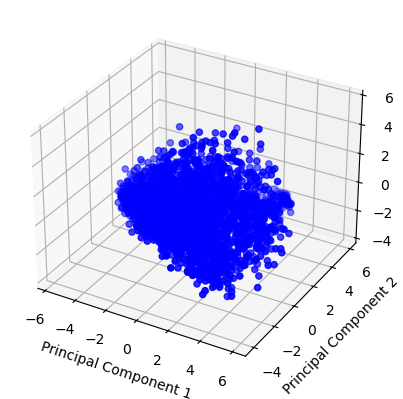

In [40]:
b_numeric = b_numeric[~b_numeric.isin([np.nan, np.inf, -np.inf]).any(axis=1)]

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled = scaler.fit_transform(b_numeric)

# Perform PCA
pca = PCA(n_components=3)
scaled_pca = pca.fit_transform(scaled)

# Create a new DataFrame with the principal components
df_pca = pd.DataFrame(data = scaled_pca, columns = ['pc1', 'pc2', 'pc3'])

# Create a 3D plot to visualize the reduced data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with the 3 components
sc = ax.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], df_pca.iloc[:, 2], c="blue")

# Add labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Show the plot
plt.show()

#### Data Visualization (EDA)

In [41]:
def plot_correlation_matrix(df, independent, numerical):
    # Compute the correlation matrix
    corr = df[numerical].corr().round(1) #

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(30, 30))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.show()

    # correlation with the independent variable
    correlations = {n: pcr(df[n], df[independent]).statistic for n in numerical}
    correlations = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])
    correlations = correlations.sort_values('Correlation', ascending=False).style.background_gradient()

    # weak_corr = correlations[(np.abs(correlations["Correlation"])) < 0.5]
    return correlations

In [42]:
for df in [full_health_a, full_health_b]:
    cols = df.select_dtypes(include='number').columns.to_list()
    df[cols] = df[cols].fillna(df[cols].mean())

In [43]:
def plot_correlation_matrix(df, numerical):
    # Compute the correlation matrix
    corr = df[numerical].corr().round(1) #

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 15))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, square=True)
    plt.show()

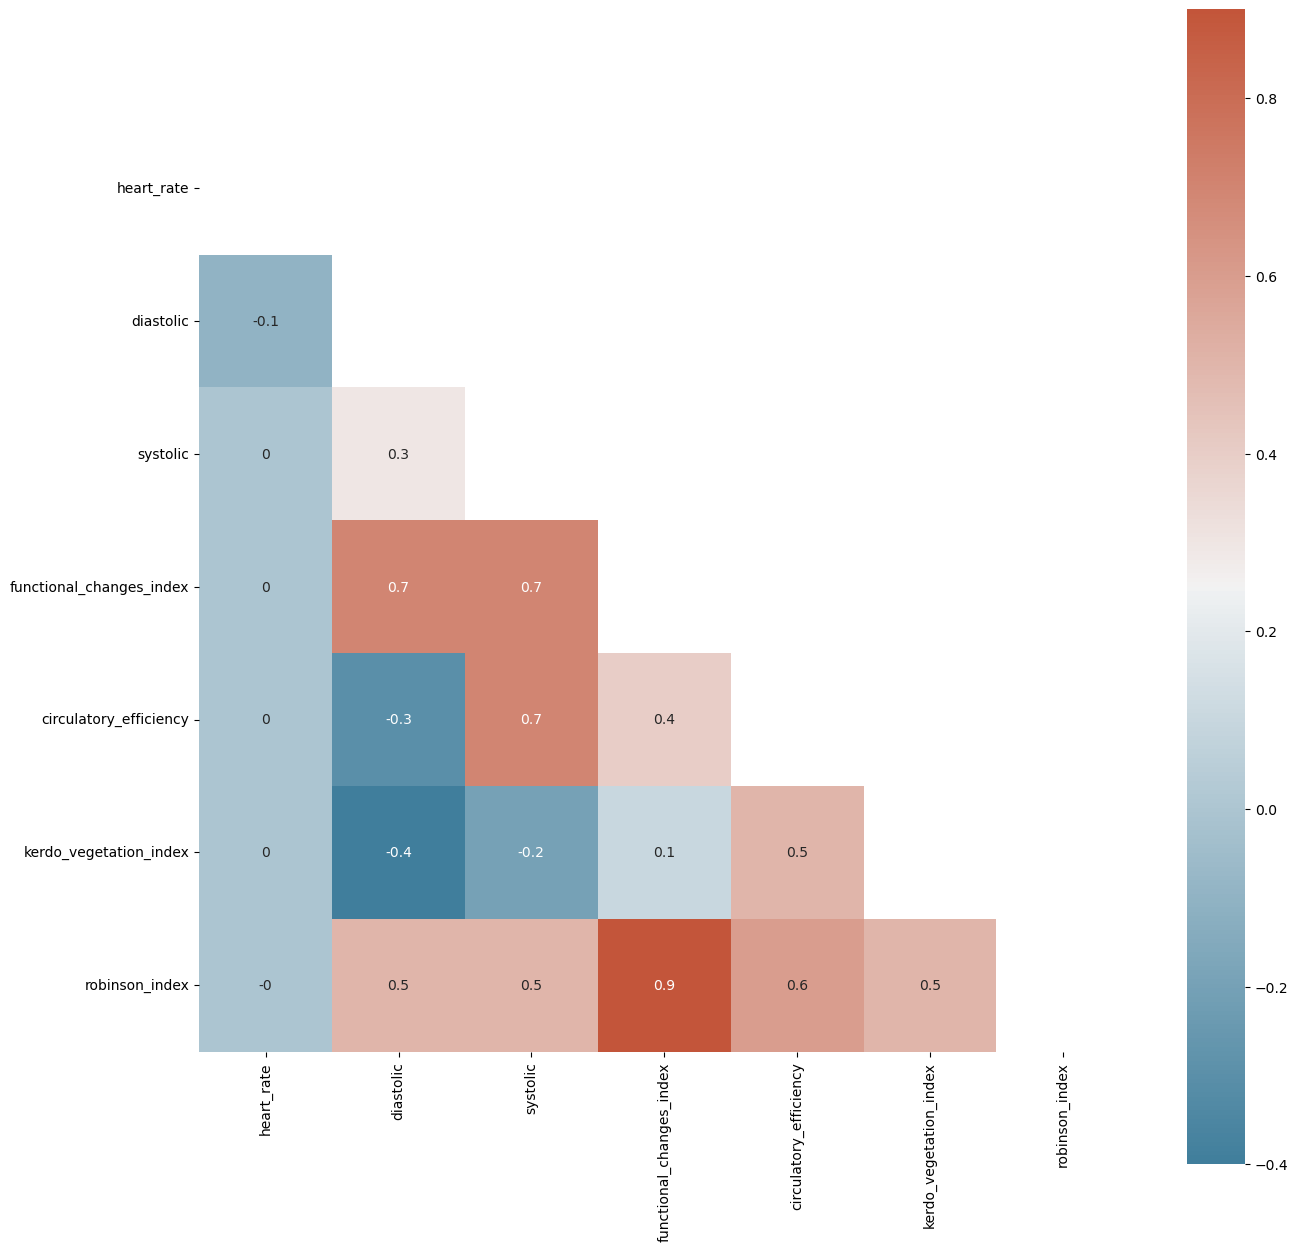

In [44]:
plot_correlation_matrix(full_health_a, full_health_a.select_dtypes(include='number').columns.to_list())

Interestingly, functional_changes_index strongly positively correlate with rohinson_index, and so do circulatory_efficiency and functional_changes_index with systolic

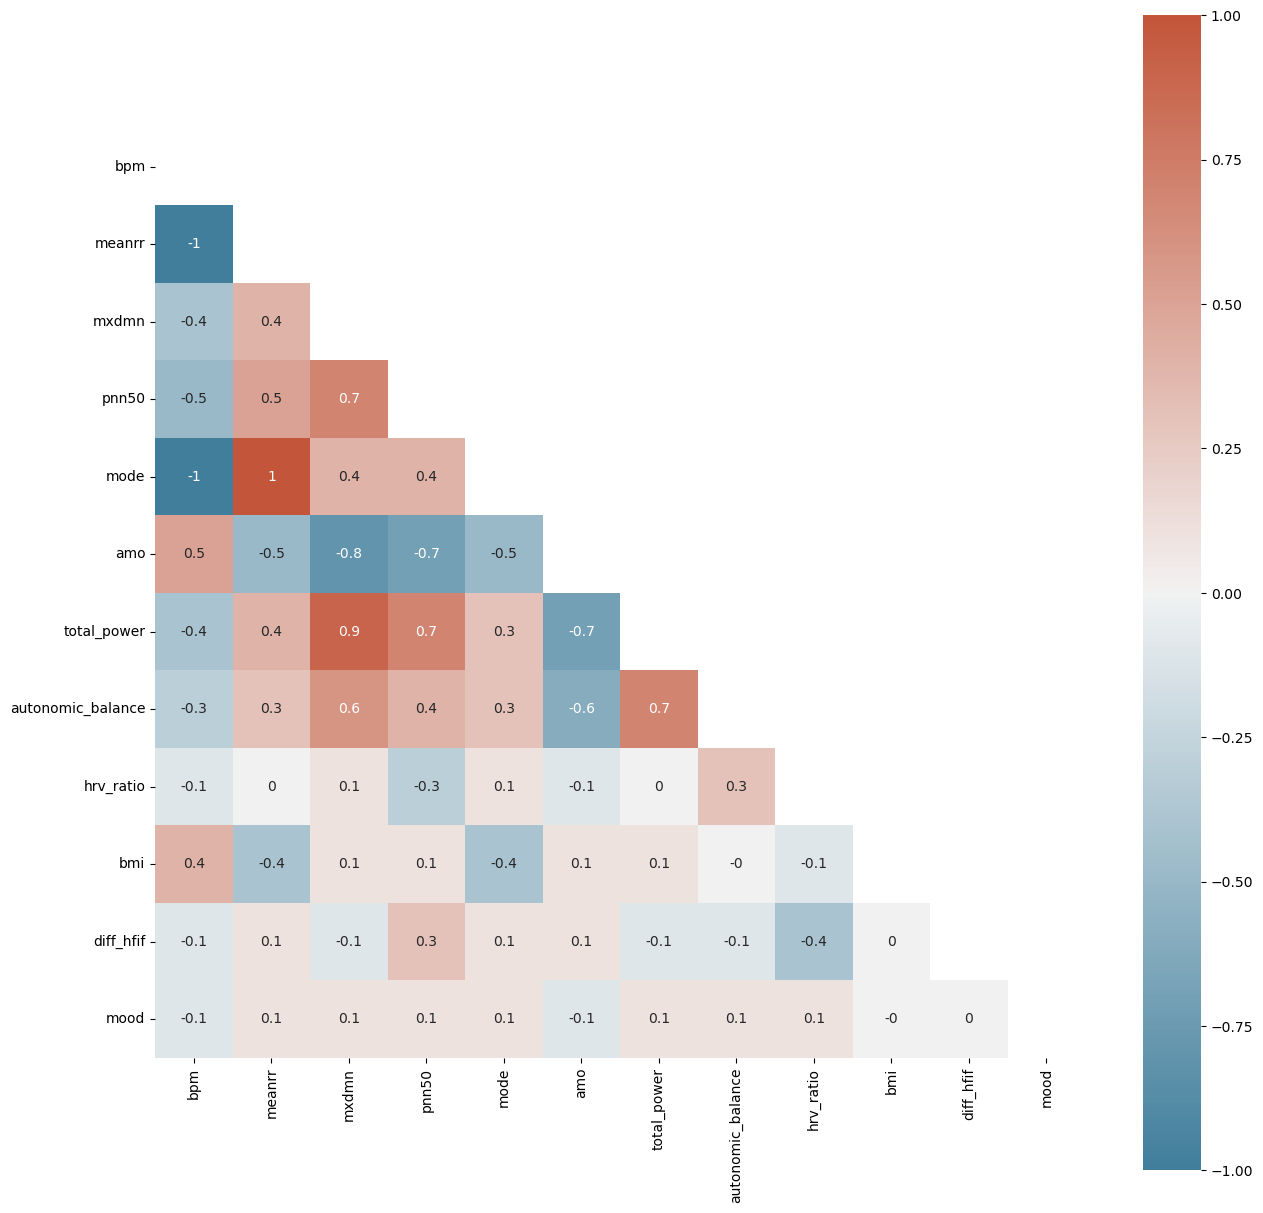

In [45]:
plot_correlation_matrix(full_health_b, full_health_b.select_dtypes(include='number').columns.to_list())

Bpm and meanrr are perfectly positively correlated with mode! So are meanrr & bpm and vlf and autonomic balance! 

Mode and npm are perfectly negatively correlated! 

Some strong negative correlations include amo & sdnn and amo & mcdmn.

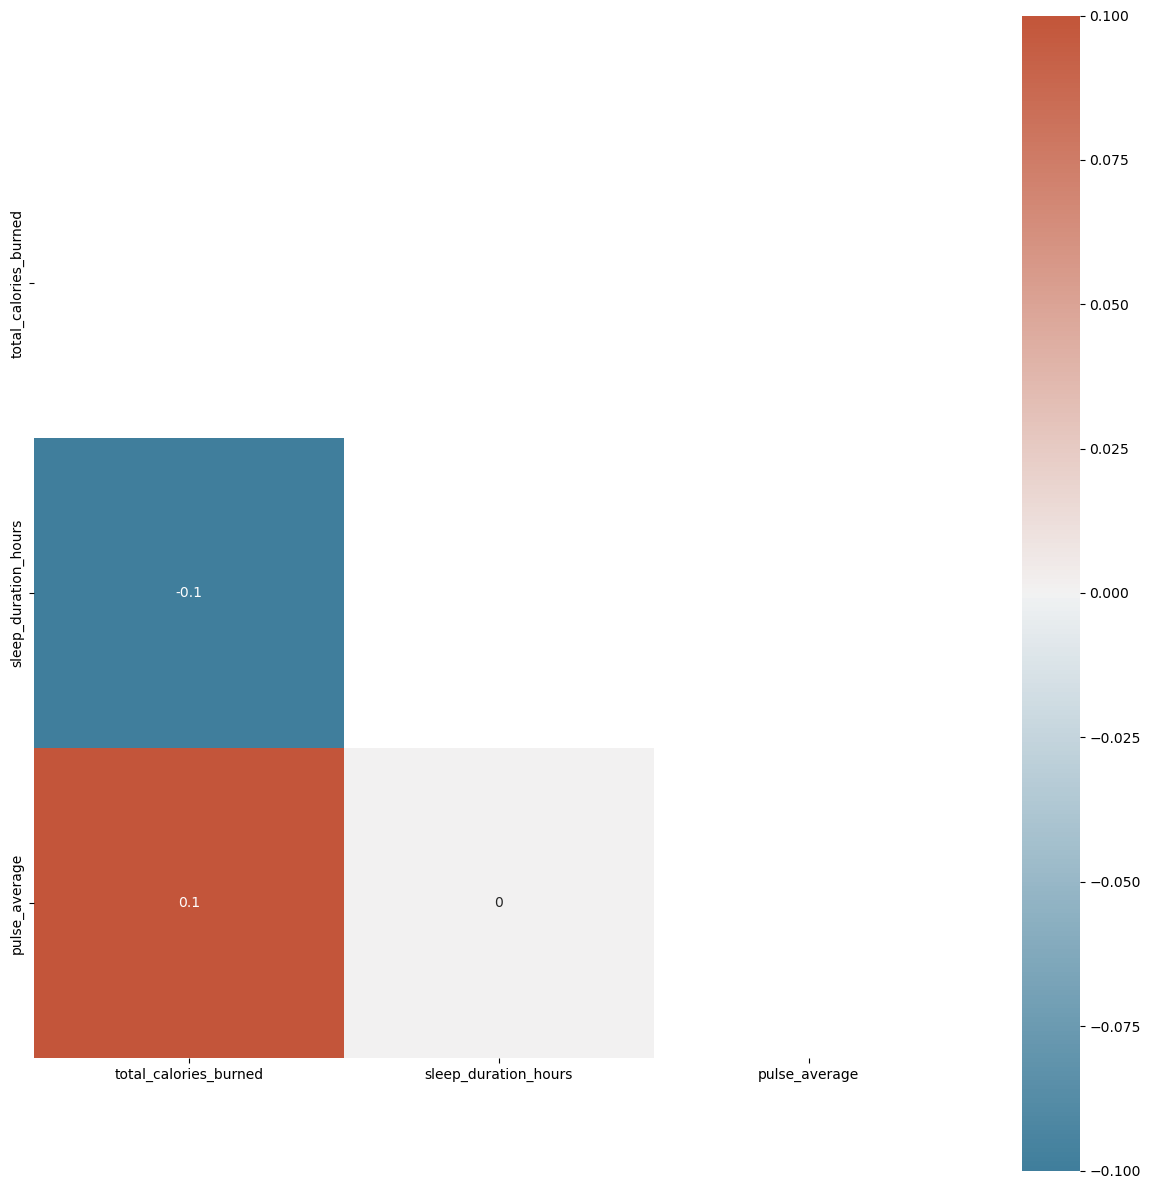

In [46]:
plot_correlation_matrix(healthy_humans, healthy_humans.select_dtypes(include='number').columns.to_list())

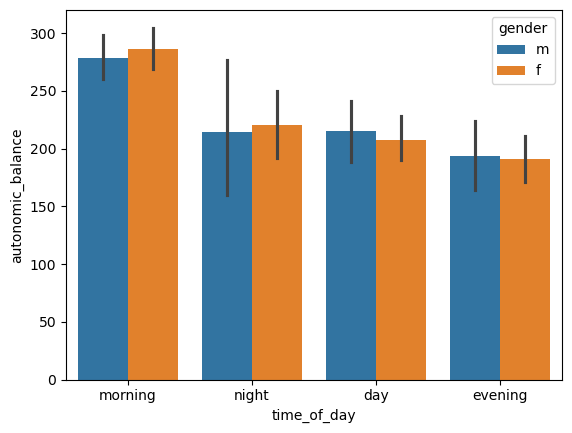

In [47]:
sns.barplot(data=full_health_b, x="time_of_day", y="autonomic_balance", hue="gender")
plt.show()

There seems to be a difference in autonomic_balance for different times of the day for both male and female, although for morningsand nights, females tend to have higher values. 

Looking at pair-wise distribution plot and scatterplot (correlation) for several key health metrics

In [48]:
full_health_b.head()

,user_code,measurement_datetime,time_of_day,bpm,meanrr,mxdmn,pnn50,mode,amo,total_power,...,gender,age_range,city,country,symptoms_onset,autonomic_balance,hrv_ratio,bmi,diff_hfif,mood
0,007b8190cf,2020-04-21 21:23:08,morning,75.0,796.0,0.119995,15.148438,0.774902,53.0,1851.0,...,m,25-34,Mandalay,Myanmar,NaN,133.25000,0.845215,33.218750,568.0,0.0
1,007b8190cf,2020-04-26 11:19:25,morning,70.0,858.0,0.109985,16.156250,0.875000,54.0,895.0,...,m,25-34,Mandalay,Myanmar,NaN,87.31250,0.995117,33.218750,-99.0,0.0
2,013f6d3e5b,2020-05-15 04:14:21,night,83.0,724.0,0.170044,17.171875,0.725098,46.0,1507.0,...,f,18-24,São Paulo,Brazil,5/15/2020,96.75000,0.830566,25.515625,449.0,-1.0
3,013f6d3e5b,2020-05-19 03:06:02,night,75.0,802.5,0.199951,22.218750,0.825195,43.0,4020.0,...,f,18-24,São Paulo,Brazil,5/15/2020,778.50000,1.031250,25.515625,673.0,0.0
4,01bad5a519,2019-12-31 09:07:43,morning,78.0,768.0,0.099976,4.039062,0.774902,56.0,713.0,...,m,45-54,St Petersburg,Russia,4/5/2020,46.09375,1.398438,29.015625,-361.0,0.0


There aren't critical difference between the 2 genders when it comes to health metics. However, the male population have a bit smoother and even distributions, unlike the female population with higher concentrations around peaks. 

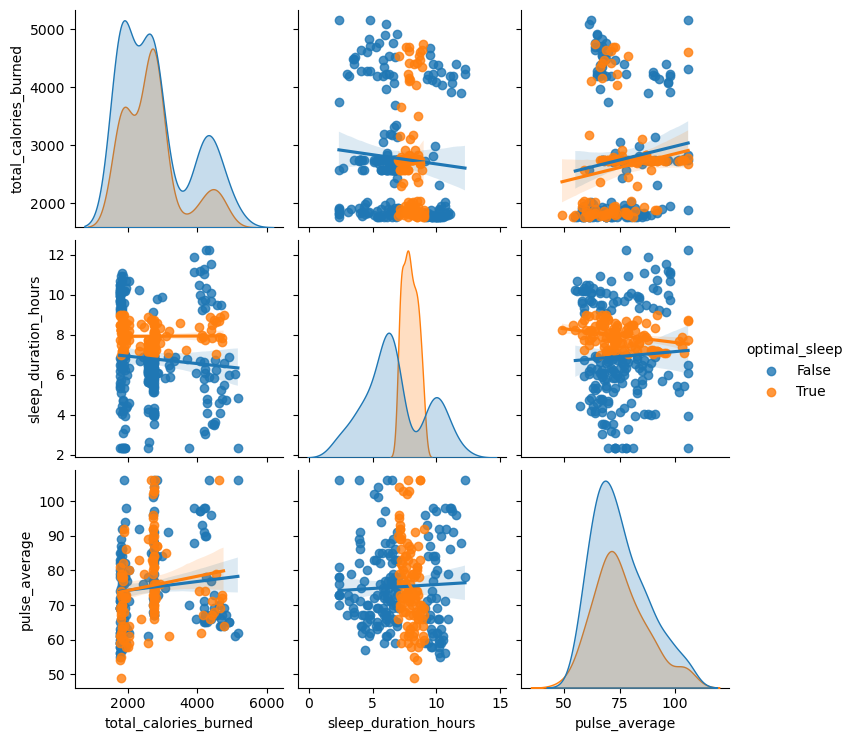

In [50]:
#Going back to healthy_humans
sns.pairplot(healthy_humans, kind="reg", hue='optimal_sleep')
plt.show()

Unfortunately, there doesn't seem to be strong correlations

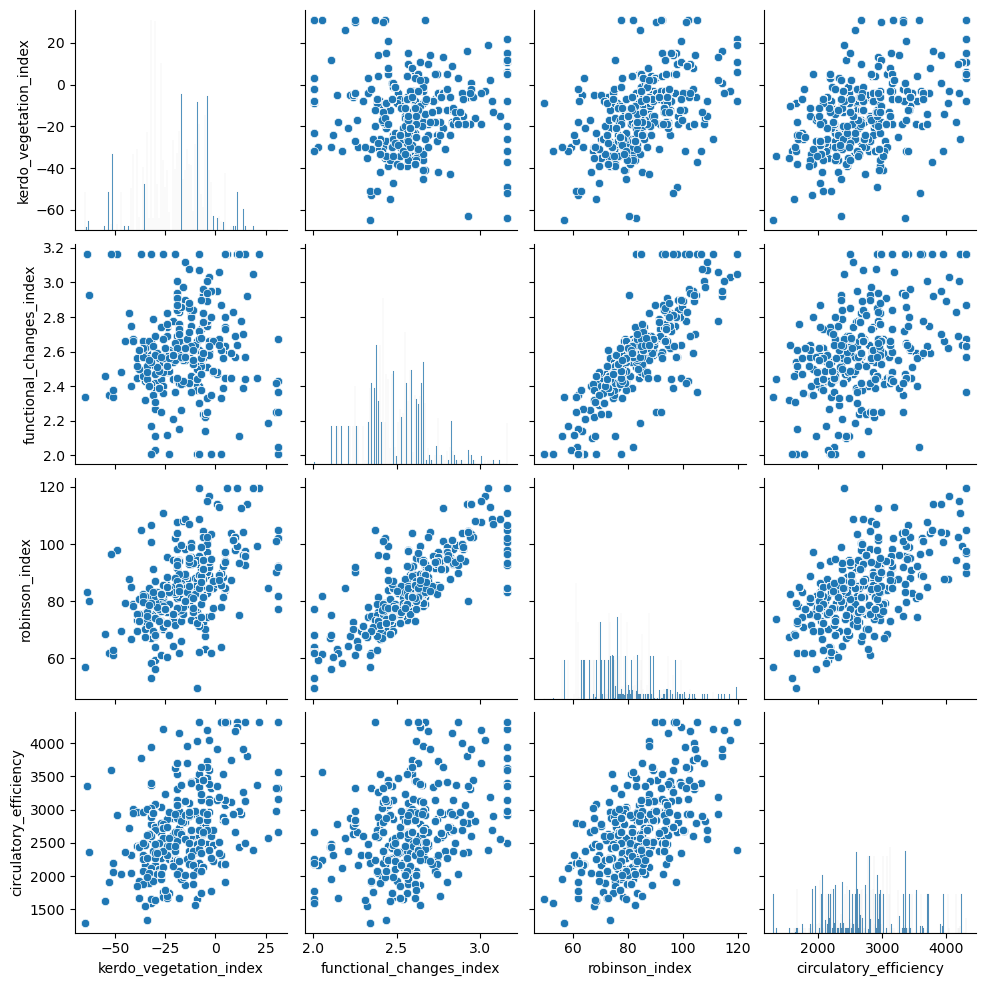

In [51]:
sns.pairplot(full_health_a[["kerdo_vegetation_index", "functional_changes_index", "robinson_index", "circulatory_efficiency"]])

# Conclusion

We did a range of EDA operations on a repository of datasets pertaining to Covid-19 health metrics and wearable device data for users, including, but not limited to, data munging, data transformation, dimension reductions, and visualizations.
Here is a recap of several important aspects.

Data Profiling: 

The data is properly divided into multiple datasets based on the values being measured (for instance, blood pressure and heart rates), and another data table explaining the meanings of all the features. There are multiple universities and organizations involved. However, they share consistent schemas and data collection methods. 

Data Completion: 

The data contains duplicates, missing values, and outliers. For example, the sleep dataset has multiple near-empty or mostly unfilled variables. The hrv_measurements dataset contains some variables that have almost 50% missing values. 

When it comes to data accuracy, a large subset of the data is collected from the wearable technology, so most of the accuracy is up to the technology. For example, someone can causually swing the wearable technology while standing and can still achieve the same distance as someone who walks a certain distance. As a result, data will need to be monitored to maintain and prevent such variations.

Data Consistency:

Overall, data is consistent when it comes to user ids. The dataset is also particular to have a date time associated to provide more intricacies. 

However, not all the ids are consistent across the datasets. This also comes into account with the missing values. For example, the wearables and sleep datasets have a vast difference in the number of rows, so it's difficult to combine data.
Also, the number of participants vary across datasets. For instance, blood_pressure and heart_rate datasets have a large discrepency of unique number of ids, so we ended up doing an "inner" join to only consider ids that has entries across both datasets. 

Data Security:

The data is established to be secure. User id's are unique, not null, and anonymous, which is important since the data is public. The dataset is used and shared in studies all across the globe, so this means that there needs to be strict guidelines for data measurement and curation.
Dataset creators specified that "no hospital visits and no extra gadgets are needed as anyone can measure their HRV at home with their smartphone".

Data Integrity: 

User id's are unique, not null, and anonymous, ensuring acceptable privacy. The dataset is public. And, there are shared practices using data from across the world, which suggests a strict guideline for data measurement and curation. 
The data contains clinically validated physical and mental health assessments, which is sure to keep data integrity
We believe the integrity is maintained well.

Data Lineage and Provenance:

Finally, since the public dataset is on Github, as long you as have access to the previous versions of the dataset, you have access to the dataset over time. 
However, the last data updated was 4 years ago, meaning that it's not dynamically updated. It is meant to be historical dataset, without newer, incoming information. 